#### Imports

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

In [2]:
import wrangle as w

In [3]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [4]:
import random 
random.seed(10)

In [5]:
import re

In [6]:
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

In [7]:
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [39]:
# read in csv with new features we are exploring
df = pd.read_csv("/Users/manny/codeup-data-science/Pigskin_Paydays/second_iterations_csv's/pivot_final.csv")

In [43]:
# basic checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             458 non-null    object 
 1   team             458 non-null    object 
 2   year             458 non-null    int64  
 3   games_played     458 non-null    float64
 4   comp             458 non-null    float64
 5   att              458 non-null    float64
 6   comp_pct         458 non-null    float64
 7   yds              458 non-null    float64
 8   avg_yds_per_att  458 non-null    float64
 9   td               458 non-null    float64
 10  int              458 non-null    float64
 11  pass_rating      458 non-null    float64
 12  rush_att         458 non-null    float64
 13  rush_yds         458 non-null    float64
 14  rush_avg         458 non-null    float64
 15  rush_td          458 non-null    float64
 16  full_name        458 non-null    object 
 17  year_signed     

In [23]:
# basic checking describe
df.describe()

,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,year_signed,percent_of_cap
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,2015.855895,12.491266,255.052402,405.430131,62.285808,2925.390830,7.119869,18.362445,9.770742,87.617686,37.755459,160.423581,3.506987,1.598253,2016.962882,8.419432
std,3.574309,3.867178,106.422785,158.877575,4.500235,1247.210722,0.795074,10.429699,4.848905,12.360980,28.766190,181.047244,1.910948,2.104532,3.387572,7.066898
min,2010.000000,4.000000,63.000000,121.000000,42.900000,604.000000,4.400000,0.000000,0.000000,46.720000,3.000000,-31.000000,-1.000000,0.000000,2011.000000,0.100000
25%,2013.000000,9.000000,159.000000,262.000000,59.500000,1798.750000,6.600000,9.000000,6.000000,79.095000,18.000000,36.000000,2.100000,0.000000,2014.000000,1.600000
50%,2016.000000,14.000000,266.000000,441.000000,62.250000,3081.500000,7.100000,18.000000,9.000000,87.365000,31.000000,99.000000,3.600000,1.000000,2017.000000,6.450000
75%,2019.000000,16.000000,346.000000,540.750000,65.600000,3964.500000,7.675000,26.000000,13.000000,95.897500,48.000000,227.250000,5.000000,2.000000,2020.000000,14.575000
max,2022.000000,17.000000,485.000000,719.000000,74.400000,5477.000000,9.600000,55.000000,30.000000,122.480000,176.000000,1206.000000,8.500000,14.000000,2023.000000,24.100000


In [24]:
df.head()

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,full_name,year_signed,percent_of_cap
0,Rex Grossman,WAS,2010,4.0,74.0,133.0,55.6,884.0,6.6,7.0,4.0,81.16,3.0,6.0,2.0,0.0,Rex Grossman,2015,0.7
1,Rex Grossman,WAS,2011,13.0,265.0,458.0,57.9,3148.0,6.9,16.0,20.0,72.39,20.0,11.0,0.6,1.0,Rex Grossman,2015,0.7
2,Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,5.0,85.67,20.0,65.0,3.2,0.0,Matt Flynn,2013,4.7
3,Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,5.0,85.67,20.0,65.0,3.2,0.0,Matt Flynn,2013,0.7
4,Jameis Winston,TB,2015,16.0,312.0,535.0,58.3,4042.0,7.6,22.0,15.0,84.19,54.0,213.0,3.9,6.0,Jameis Winston,2015,4.4


In [25]:
# merging new csv info with salary info
# df['year'] = df['year'].astype('object')
# df_salaries = pd.read_csv('salaries_data')
# df_salaries["full_name"] = df_salaries['0'].astype(str) +" "+ df_salaries["1"]
# df['year'] = [str(x) for x in df['year']]

In [26]:
# checking salary df
df_salaries.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,full_name
0,Aaron,Rodgers,GB/NYJ,2022,5,"$150,815,000","$50,271,667","$150,665,000",24.1%,"$162,839,635","$54,279,879","$162,677,675",NaN,Aaron Rodgers
1,Josh,Allen,Bills,2021,6,"$258,000,000","$43,000,000","$150,000,000",23.6%,"$317,799,452","$52,966,575","$184,767,123",NaN,Josh Allen
2,Russell,Wilson,Broncos,2022,5,"$245,000,000","$49,000,000","$165,000,000",23.5%,"$264,534,102","$52,906,820","$178,155,620",NaN,Russell Wilson
3,Lamar,Jackson,Ravens,2023,5,"$260,000,000","$52,000,000","$185,000,000",23.1%,"$260,000,000","$52,000,000","$185,000,000",NaN,Lamar Jackson
4,Patrick,Mahomes,Chiefs,2020,10,"$450,000,000","$45,000,000","$141,000,000",22.7%,"$510,393,542","$51,039,354","$159,923,310",NaN,Patrick Mahomes


In [27]:
# Isolating years we want to use for project
# def is_in(x):
#     return x in ['2023','2022','2021','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']
    
# df_salaries = df_salaries[df_salaries['3'].apply(is_in)]

In [28]:
# df_salaries['3'].value_counts()

In [29]:
# merging data frames
# test_df = df.merge(df_salaries[['full_name', '3','8']], 
#                    left_on =['name', 'year'], 
#                    right_on = ['full_name', '3'], how = 'outer')

In [30]:
# filling empty name column
# test_df.full_name = test_df.full_name.fillna(test_df.name)

In [31]:
# verify it filled correctly
test_df[test_df.name=='Patrick Mahomes']

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,...,rush_att,rush_yds,rush_avg,rush_td,full_name_x,year_signed,percent_of_cap,full_name_y,3,8
197,Patrick Mahomes,KC,2018,16.0,383.0,580.0,66.0,5097.0,8.8,50.0,...,60.0,272.0,4.5,2.0,Patrick Mahomes,2020.0,22.7,NaN,NaN,NaN
198,Patrick Mahomes,KC,2019,14.0,319.0,484.0,65.9,4031.0,8.3,26.0,...,43.0,218.0,5.1,2.0,Patrick Mahomes,2020.0,22.7,NaN,NaN,NaN
199,Patrick Mahomes,KC,2020,15.0,390.0,588.0,66.3,4740.0,8.1,38.0,...,62.0,308.0,5.0,2.0,Patrick Mahomes,2020.0,22.7,Patrick Mahomes,2020,22.7%


In [ ]:
# test_df[test_df.name.isnull() == False]

In [ ]:
# test_df['year'][test_df['year'].isnull()] = test_df['3']

In [ ]:
# test_df.head()

In [ ]:
# filling empty name column
# test_df['name'] = np.where(test_df['name'].isnull(), test_df['full_name'], test_df['name'] )

In [32]:
# sorting by player name and year
test_df = test_df.sort_values(by= ['name','year'])

In [33]:
test_df.head()

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,...,rush_att,rush_yds,rush_avg,rush_td,full_name_x,year_signed,percent_of_cap,full_name_y,3,8
230,Aaron Rodgers,GB,2010,15.0,312.0,475.0,65.7,3922.0,8.3,28.0,...,64.0,356.0,5.6,4.0,Aaron Rodgers,2013.0,17.9,NaN,NaN,NaN
231,Aaron Rodgers,GB,2011,15.0,342.0,501.0,68.3,4637.0,9.3,45.0,...,60.0,257.0,4.3,3.0,Aaron Rodgers,2013.0,17.9,NaN,NaN,NaN
232,Aaron Rodgers,GB,2012,16.0,371.0,552.0,67.2,4295.0,7.8,39.0,...,54.0,259.0,4.8,2.0,Aaron Rodgers,2013.0,17.9,NaN,NaN,NaN
233,Aaron Rodgers,GB,2013,9.0,193.0,290.0,66.6,2536.0,8.7,17.0,...,30.0,120.0,4.0,0.0,Aaron Rodgers,2013.0,17.9,Aaron Rodgers,2013,17.9%
234,Aaron Rodgers,GB,2014,16.0,341.0,520.0,65.6,4381.0,8.4,38.0,...,43.0,269.0,6.3,2.0,Aaron Rodgers,2018.0,18.9,NaN,NaN,NaN


In [37]:
# test_df[['full_name','3','8']] = test_df[['full_name','3','8']].fillna(method='bfill')

In [ ]:
# test_df = test_df.dropna()

In [ ]:
# test_df = test_df.drop_duplicates()

In [34]:
test_df.shape

(1677, 22)

In [42]:
test_df[test_df.name == 'Patrick Mahomes']

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,...,rush_att,rush_yds,rush_avg,rush_td,full_name_x,year_signed,percent_of_cap,full_name_y,3,8
197,Patrick Mahomes,KC,2018,16.0,383.0,580.0,66.0,5097.0,8.8,50.0,...,60.0,272.0,4.5,2.0,Patrick Mahomes,2020.0,22.7,NaN,NaN,NaN
198,Patrick Mahomes,KC,2019,14.0,319.0,484.0,65.9,4031.0,8.3,26.0,...,43.0,218.0,5.1,2.0,Patrick Mahomes,2020.0,22.7,NaN,NaN,NaN
199,Patrick Mahomes,KC,2020,15.0,390.0,588.0,66.3,4740.0,8.1,38.0,...,62.0,308.0,5.0,2.0,Patrick Mahomes,2020.0,22.7,Patrick Mahomes,2020,22.7%


In [44]:
# creating new data frame with percent of cap backfilled for exploration
# master_df = pd.DataFrame()

# for i in set(test_df[test_df.name.isnull() == False].name):
#     star = test_df[test_df.name == i]
#     star = star.sort_values(by= ['name','year'])
#     star[['full_name','3','8']] = star[['full_name','3','8']].fillna(method='bfill')
#     master_df = pd.concat([master_df, star])

In [ ]:
# checking df to make sure it filled correctly
# master_df[master_df.name=='Tony Romo']

In [ ]:
# check the shape before dropping nulls
# master_df.shape

In [ ]:
# drop nulls
# master_df = master_df.dropna()

In [ ]:
# check shape after dropping nulls
# master_df.shape

In [ ]:
# rename columns
# master_df = master_df.rename(columns={'3': 'year_signed', '8': 'percent_of_cap'})

In [ ]:
# # take out '%' and turn percent of cap into a float
# master_df['percent_of_cap'] = master_df['percent_of_cap'].str.replace('%', '')
# master_df['percent_of_cap'] = master_df['percent_of_cap'].astype(float)

In [ ]:
# create csv with final info
# master_df.to_csv('pivot_final.csv', index=False)

In [ ]:
# read in new csv
# df = pd.read_csv('pivot_final.csv')

In [6]:
df = pd.read_csv('last_csv.csv')

In [7]:
df

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,...,loss,wild_card,div_rnd,conf_rnd,superbowl,superbowl_win,win_perc,loss_perc,td_per_game,sk_per_game
0,Blaine Gabbert,JAX,2011,15.0,210.0,413.0,50.8,2214.0,5.4,12.0,...,10,0.0,0.0,0.0,0.0,0.0,0.27,0.67,0.80,2.67
1,Blaine Gabbert,JAX,2012,10.0,162.0,278.0,58.3,1662.0,6.0,9.0,...,9,0.0,0.0,0.0,0.0,0.0,0.10,0.90,0.90,2.20
2,Blaine Gabbert,SF,2015,8.0,178.0,282.0,63.1,2031.0,7.2,10.0,...,5,0.0,0.0,0.0,0.0,0.0,0.38,0.62,1.25,3.12
3,Blaine Gabbert,SF,2016,6.0,91.0,160.0,56.9,925.0,5.8,5.0,...,4,0.0,0.0,0.0,0.0,0.0,0.17,0.67,0.83,1.83
4,Blaine Gabbert,ARI,2017,5.0,95.0,171.0,55.6,1086.0,6.4,6.0,...,3,0.0,0.0,0.0,0.0,0.0,0.40,0.60,1.20,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Marcus Mariota,TEN,2016,15.0,276.0,451.0,61.2,3426.0,7.6,26.0,...,7,0.0,0.0,0.0,0.0,0.0,0.53,0.47,1.73,1.53
422,Marcus Mariota,TEN,2017,15.0,281.0,453.0,62.0,3232.0,7.1,13.0,...,6,1.0,1.0,0.0,0.0,0.0,0.60,0.40,0.87,1.80
423,Marcus Mariota,TEN,2018,14.0,228.0,331.0,68.9,2528.0,7.6,11.0,...,6,0.0,0.0,0.0,0.0,0.0,0.50,0.43,0.79,3.00
424,Marcus Mariota,TEN,2019,7.0,95.0,160.0,59.4,1203.0,7.5,7.0,...,4,1.0,1.0,1.0,0.0,0.0,0.29,0.57,1.00,3.57


In [9]:
df['win_perc'] = round((df.win / df.games_played),2)
df['loss_perc'] = round((df.loss / df.games_played), 2)

In [10]:
df['td_per_game'] = round((df.td / df.games_played),2)

In [11]:
df['sk_per_game'] = round((df.Sk / df.games_played), 2)

In [36]:
# df = df.drop(237)

# Explore

In [178]:
df.head()

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,full_name,year_signed,percent_of_cap,Player,Age,td_perc,int_perc,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss,wild_card,div_rnd,conf_rnd,superbowl,superbowl_win,win_perc,loss_perc,td_per_game,sk_per_game
0,Rex Grossman,WAS,2010,4.0,74.0,133.0,55.6,884.0,6.6,7.0,4.0,81.16,3.0,6.0,2.0,0.0,Rex Grossman,2015,0.7,Rex Grossman,30,5.3,3.0,42,64,11.9,221.0,33.000000,9,0.0,1.0,1,2,0.0,0.0,0.0,0.0,0.0,0.25,0.50,1.75,2.25
1,Rex Grossman,WAS,2011,13.0,265.0,458.0,57.9,3148.0,6.9,16.0,20.0,72.39,20.0,11.0,0.6,1.0,Rex Grossman,2015,0.7,Rex Grossman,31,3.5,4.4,161,51,11.9,242.4,41.500000,25,2.0,2.0,5,8,0.0,0.0,0.0,0.0,0.0,0.38,0.62,1.23,1.92
2,Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,5.0,85.67,20.0,65.0,3.2,0.0,Matt Flynn,2013,4.7,Matt Flynn,28,4.0,2.5,0,56,11.2,198.9,52.597577,24,3.0,2.0,2,3,1.0,0.0,0.0,0.0,0.0,0.29,0.43,1.14,3.43
3,Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,5.0,85.67,20.0,65.0,3.2,0.0,Matt Flynn,2013,0.7,Matt Flynn,28,4.0,2.5,0,56,11.2,198.9,52.597577,24,3.0,2.0,2,3,1.0,0.0,0.0,0.0,0.0,0.29,0.43,1.14,3.43
4,Jameis Winston,TB,2015,16.0,312.0,535.0,58.3,4042.0,7.6,22.0,15.0,84.19,54.0,213.0,3.9,6.0,Jameis Winston,2015,4.4,Jameis Winston,21,4.1,2.8,201,68,13.0,252.6,57.200000,27,2.0,3.0,6,10,0.0,0.0,0.0,0.0,0.0,0.38,0.62,1.38,1.69


In [8]:
# SPLIT FUNCTION

def split_function(df):
    '''
    Take in a data frame and returns:
    train, validate, test 
    subset data frames
    '''
    train, test = train_test_split(df,
                              test_size=0.20,
                              random_state=123,
                                  )
    train, validate = train_test_split(train,
                                  test_size=.25,
                                  random_state=123,
                                      )
    return train, validate, test

In [9]:
train, validate, test = split_function(df)

In [10]:
print(train.shape[0])
print(validate.shape[0])
print(test.shape[0])

255
85
86


In [11]:
def stats_relationship(train, var1, target):
    sns.regplot(data=train, x=var1, y=target, line_kws={'color':'red'})
    plt.show()
    
    alpha = 0.05

    r, p = stats.spearmanr(train[var1], train[target])
    print('r =', r)
    print('p =', p)
    
    if p < alpha:
        print(f"There is a relationship between the {target} and the {var1} of QB's")
    else:
        print(f"There is not a relationship between the {target} and the {var1} of QB's")


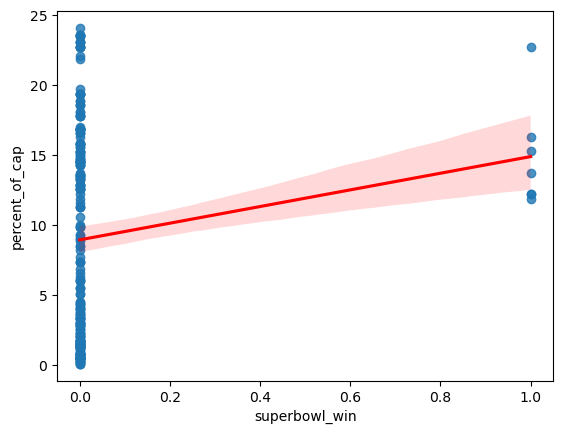

r = 0.11722788792566012
p = 0.06159053185537799
There is not a relationship between the percent_of_cap and the superbowl_win of QB's


In [12]:
stats_relationship(train, 'superbowl_win', 'percent_of_cap')

<AxesSubplot:>

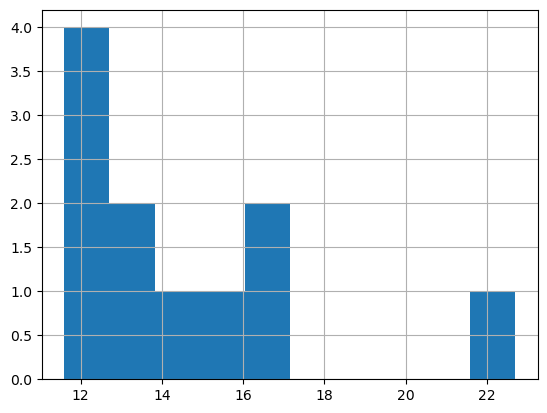

In [13]:
superbowl_sample = df[df.superbowl_win == 1].percent_of_cap

superbowl_sample.hist()


<AxesSubplot:>

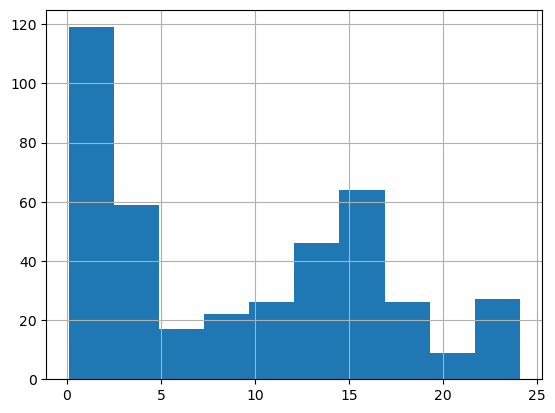

In [14]:
no_superbowl_sample = df[df.superbowl_win == 0].percent_of_cap

no_superbowl_sample.hist()

In [15]:
alpha = .05

In [16]:
print(superbowl_sample.var())
print(no_superbowl_sample.var())


10.533636363636365
52.884975612595326


In [17]:
t, p = stats.ttest_ind(superbowl_sample, no_superbowl_sample, equal_var=False)
t, p / 2


(5.297996447857033, 7.538653165749927e-05)

In [18]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


In [183]:
train.head()

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,full_name,year_signed,percent_of_cap,Player,Age,td_perc,int_perc,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss,wild_card,div_rnd,conf_rnd,superbowl,superbowl_win,win_perc,loss_perc,td_per_game,sk_per_game
91,Philip Rivers,LAC,2012,16.0,338.0,527.0,64.1,3606.0,6.8,26.0,15.0,88.63,27.0,40.0,1.5,0.0,Philip Rivers,2015,14.5,Philip Rivers,31,4.9,2.8,184,80,10.7,225.4,42.6,49,0.0,0.0,7,9,0.0,0.0,0.0,0.0,0.0,0.44,0.56,1.62,3.06
180,Patrick Mahomes,KC,2019,14.0,319.0,484.0,65.9,4031.0,8.3,26.0,5.0,105.31,43.0,218.0,5.1,2.0,Patrick Mahomes,2020,22.7,Patrick Mahomes,24,5.4,1.0,176,83,12.6,287.9,77.7,17,1.0,1.0,11,3,0.0,1.0,1.0,1.0,1.0,0.79,0.21,1.86,1.21
360,Mike White,NYJ,2022,4.0,103.0,175.0,58.9,1192.0,6.8,3.0,4.0,75.70,6.0,9.0,1.5,1.0,Mike White,2022,1.2,Mike White,27,1.7,2.3,56,60,11.6,298.0,37.0,9,0.0,0.0,1,3,0.0,0.0,0.0,0.0,0.0,0.25,0.75,0.75,2.25
243,Andrew Luck,IND,2015,7.0,162.0,293.0,55.3,1881.0,6.4,15.0,12.0,74.91,33.0,196.0,5.9,0.0,Andrew Luck,2016,15.8,Andrew Luck,26,5.1,4.1,92,87,11.6,268.7,52.4,15,1.0,2.0,2,5,0.0,0.0,0.0,0.0,0.0,0.29,0.71,2.14,2.14
76,Kirk Cousins,WAS,2014,6.0,126.0,204.0,61.8,1710.0,8.4,10.0,9.0,86.44,7.0,20.0,2.9,0.0,Kirk Cousins,2016,12.9,Kirk Cousins,26,4.9,4.4,75,81,13.6,285.0,52.3,8,0.0,0.0,1,4,0.0,0.0,0.0,0.0,0.0,0.17,0.67,1.67,1.33


In [ ]:
# create the pair plot with the reordered columns
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}},corner=True)
plt.show()

In [184]:
feature_corr = train.corr(method='spearman')
feature_corr

,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,year_signed,percent_of_cap,Age,td_perc,int_perc,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss,wild_card,div_rnd,conf_rnd,superbowl,superbowl_win,win_perc,loss_perc,td_per_game,sk_per_game
year,1.000000,-0.097913,-0.088242,-0.144361,0.213392,-0.141692,-0.075159,-0.127174,-0.248827,0.081302,0.040783,0.065402,0.051376,0.191780,0.931244,-0.025923,0.000862,-0.036342,-0.141097,-0.116077,-0.252552,-0.261962,-0.132389,-0.158040,-0.132524,-0.023639,0.031939,-0.062999,-0.118459,0.067729,-0.012142,0.002497,-0.027697,-0.032454,-0.016375,-0.036471,-0.088200,-0.095417
games_played,-0.097913,1.000000,0.881597,0.889654,0.392123,0.883576,0.369784,0.823485,0.547791,0.492981,0.552584,0.309696,-0.006713,0.346899,-0.027258,0.603941,0.162653,0.423969,-0.312177,0.875431,0.329774,0.121166,0.495335,0.511517,0.644307,0.561681,0.639303,0.808074,0.376421,0.273898,0.312856,0.212174,0.155958,0.109646,0.586748,-0.377859,0.515019,-0.046730
comp,-0.088242,0.881597,1.000000,0.982626,0.564591,0.973846,0.399718,0.887298,0.571987,0.569713,0.377069,0.136417,-0.127939,0.238150,-0.033003,0.650036,0.307305,0.455472,-0.335641,0.972495,0.338573,0.026832,0.751412,0.567470,0.594464,0.565843,0.607643,0.762421,0.389638,0.185401,0.262096,0.214057,0.144772,0.093367,0.565913,-0.292064,0.666830,-0.030468
att,-0.144361,0.889654,0.982626,1.000000,0.426755,0.963149,0.322933,0.859713,0.631914,0.466191,0.379044,0.144623,-0.112513,0.226555,-0.093589,0.619097,0.272438,0.394582,-0.276262,0.958381,0.336761,0.041368,0.724648,0.508983,0.610753,0.556934,0.598630,0.731417,0.438341,0.163906,0.221414,0.189693,0.137395,0.096013,0.520910,-0.245866,0.623035,-0.014310
comp_pct,0.213392,0.392123,0.564591,0.426755,1.000000,0.533149,0.576460,0.564485,0.046404,0.788685,0.162838,0.005549,-0.169714,0.141450,0.246993,0.425524,0.274130,0.518286,-0.409749,0.550816,0.168801,-0.072222,0.536102,0.563599,0.214847,0.338481,0.353072,0.513271,-0.045294,0.188111,0.270404,0.179445,0.101366,0.021027,0.497957,-0.359074,0.562757,-0.092447
yds,-0.141692,0.883576,0.973846,0.963149,0.533149,1.000000,0.534446,0.919013,0.571380,0.617530,0.406849,0.161653,-0.109053,0.260255,-0.073729,0.671807,0.296730,0.530841,-0.323695,0.984560,0.382732,0.219757,0.799079,0.633124,0.588159,0.561363,0.603346,0.790657,0.349403,0.183346,0.301635,0.260816,0.194395,0.127036,0.601831,-0.330474,0.714911,-0.037913
avg_yds_per_att,-0.075159,0.369784,0.399718,0.322933,0.576460,0.534446,1.000000,0.588977,0.093524,0.792795,0.286001,0.135993,-0.039939,0.237590,-0.011833,0.431261,0.179275,0.708325,-0.271354,0.499641,0.345556,0.727775,0.601562,0.700677,0.174637,0.260351,0.265875,0.523234,-0.112368,0.185489,0.335249,0.318463,0.250750,0.125811,0.523205,-0.410392,0.627622,-0.111195
td,-0.127174,0.823485,0.887298,0.859713,0.564485,0.919013,0.588977,1.000000,0.453361,0.749842,0.430374,0.199164,-0.059799,0.242448,-0.059023,0.678893,0.290388,0.780721,-0.370888,0.918051,0.384453,0.263750,0.734215,0.715641,0.508553,0.556039,0.607703,0.831365,0.198067,0.257211,0.353598,0.287682,0.203257,0.119753,0.687136,-0.437487,0.884762,-0.088708
int,-0.248827,0.547791,0.571987,0.631914,0.046404,0.571380,0.093524,0.453361,1.000000,-0.081005,0.246016,0.119870,-0.045313,0.059069,-0.213097,0.226667,0.084142,0.086149,0.487539,0.564784,0.257220,0.076747,0.407839,0.088329,0.437358,0.314785,0.351845,0.323180,0.556852,-0.054560,-0.064974,-0.026382,0.021015,0.066019,0.141209,0.080351,0.259771,0.022433
pass_rating,0.081302,0.492981,0.569713,0.466191,0.788685,0.617530,0.792795,0.749842,-0.081005,1.000000,0.305871,0.132691,-0.060638,0.238343,0.129743,0.564537,0.276700,0.825468,-0.648765,0.619618,0.269653,0.324643,0.589164,0.778299,0.252250,0.393857,0.411764,0.670737,-0.137776,0.313119,0.419300,0.331336,0.219893,0.092336,0.664284,-0.524347,0.783444,-0.125326


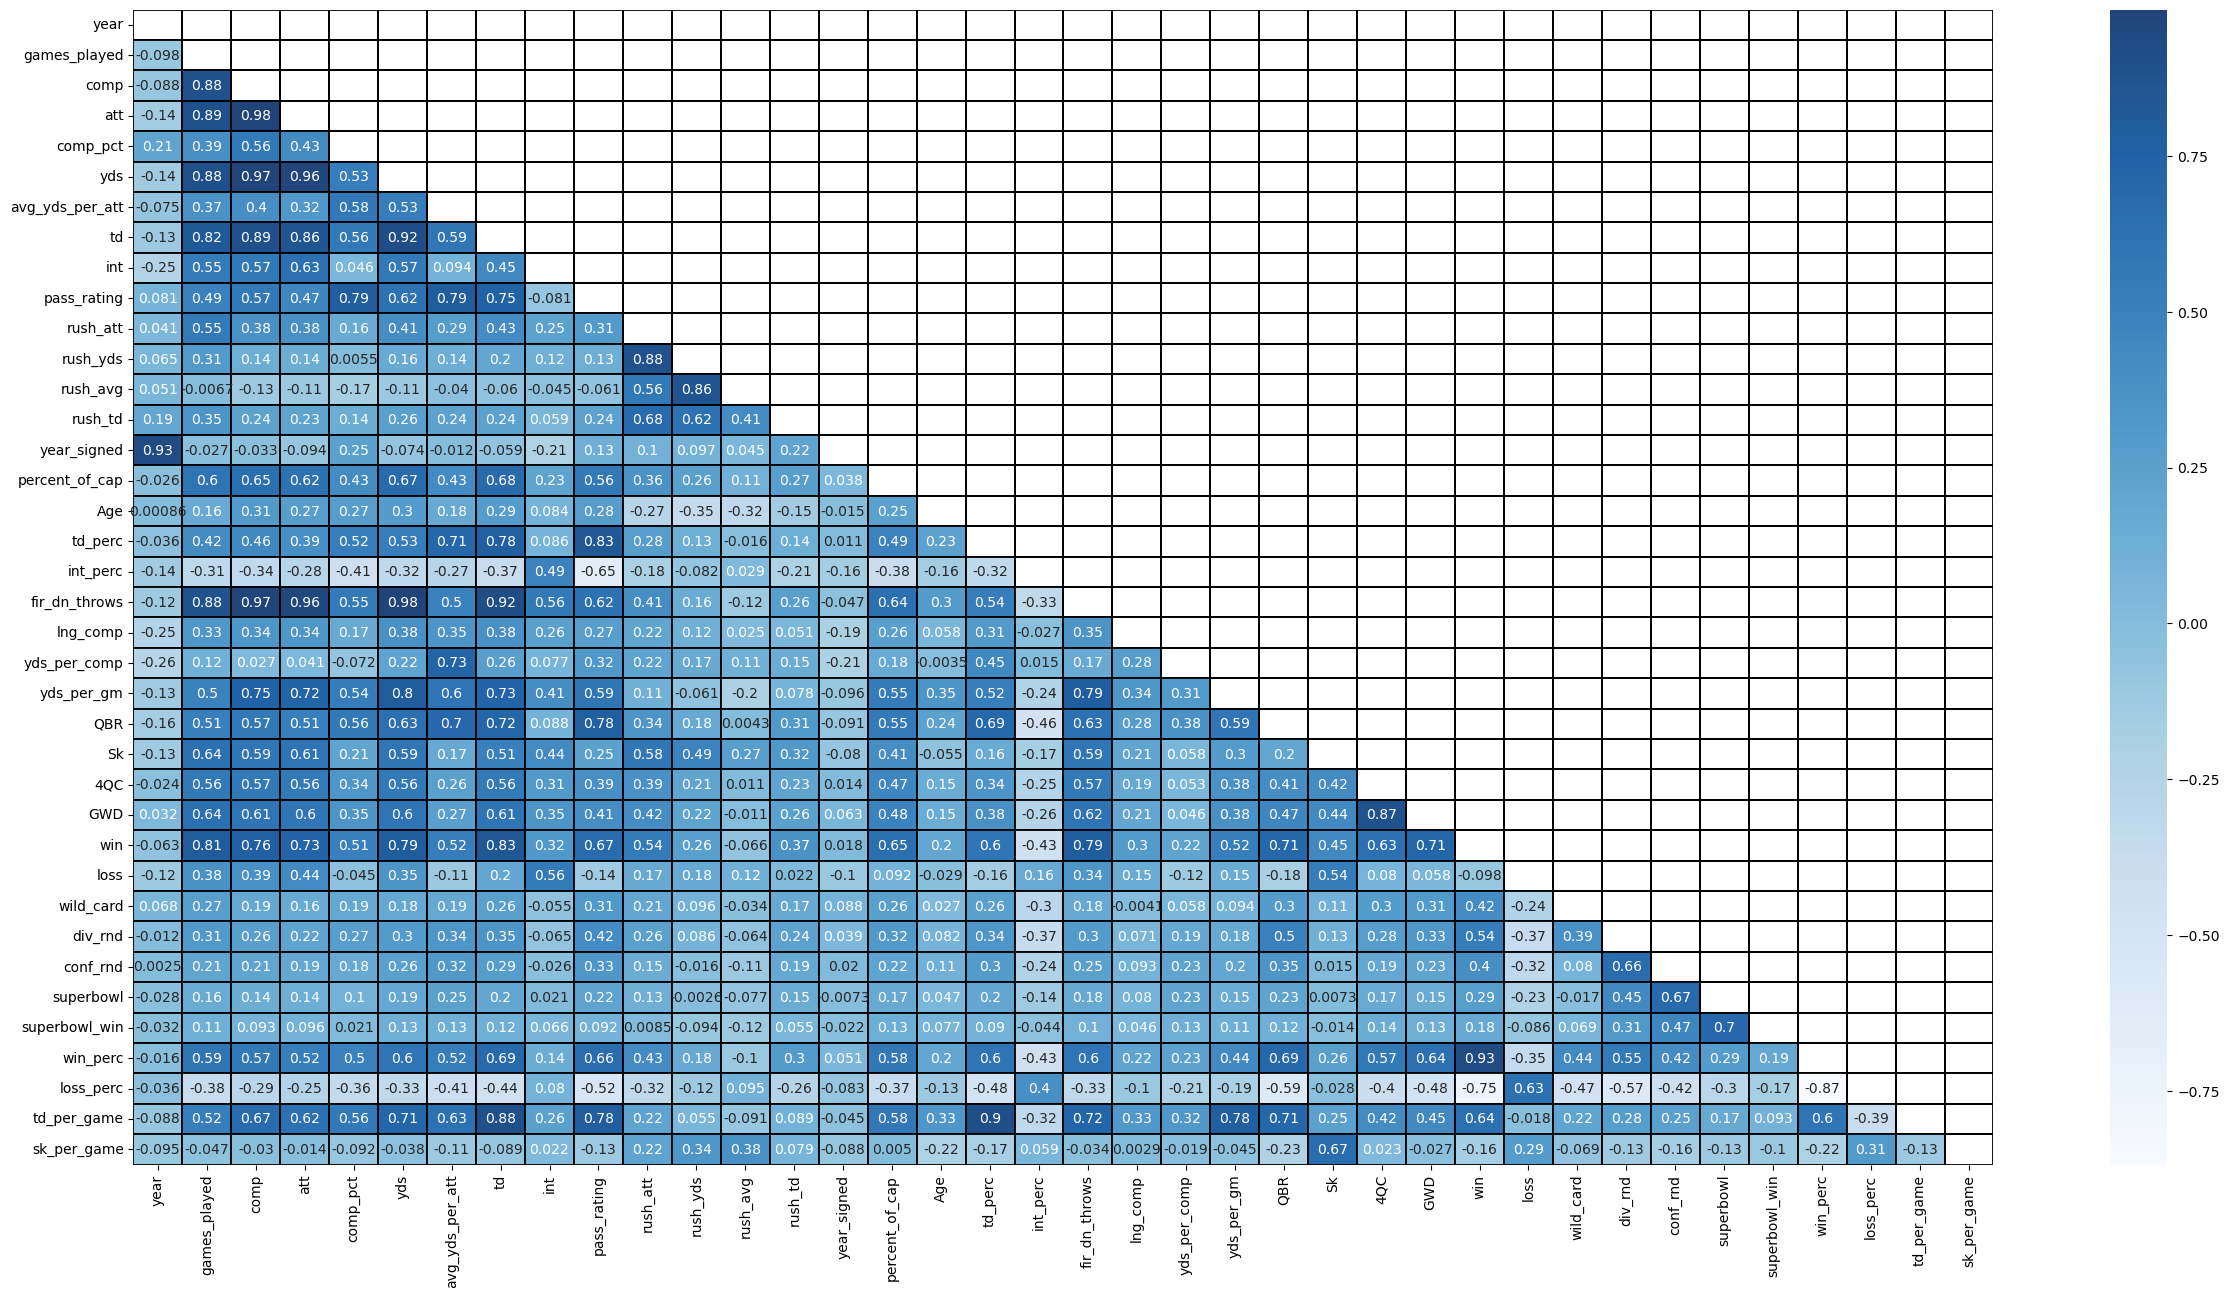

In [186]:
kwargs= {'alpha':.9, 'linewidth':.3, 'linestyle':'-',
        'linecolor':'k', 'rasterized':False, 'edgecolor':'w',
        'capstyle':'projecting',}

plt.figure(figsize=(30,15))
sns.heatmap(feature_corr, cmap='Blues', annot=True, mask = np.triu(feature_corr), **kwargs)


plt.show()

In [ ]:
['year', 'year_signed']

In [12]:
def correlation_tests(train, columns_list, target):
    '''
    Runs a correlation test on dataframe features vs target variable
    '''
    corr_df = pd.DataFrame({'feature': [],
                        'r': [],
                       'p': []})
    for i, col in enumerate(train[columns_list]):
        r, p = stats.pearsonr(train[col], train[target])
        corr_df.loc[i] = [col, abs(r), p]
    to_return = corr_df.sort_values(by='r', ascending=False)
    to_return['target'] = target
    return to_return

In [13]:
target = 'percent_of_cap'
columns_list = df.select_dtypes(exclude=['object']).drop(columns=target).columns.to_list()


In [14]:
columns_list

['year',
 'games_played',
 'comp',
 'att',
 'comp_pct',
 'yds',
 'avg_yds_per_att',
 'td',
 'int',
 'pass_rating',
 'rush_att',
 'rush_yds',
 'rush_avg',
 'rush_td',
 'year_signed',
 'Age',
 'td_perc',
 'int_perc',
 'fir_dn_throws',
 'lng_comp',
 'yds_per_comp',
 'yds_per_gm',
 'QBR',
 'Sk',
 '4QC',
 'GWD',
 'win',
 'loss',
 'wild_card',
 'div_rnd',
 'conf_rnd',
 'superbowl',
 'superbowl_win',
 'win_perc',
 'loss_perc',
 'td_per_game',
 'sk_per_game']

In [19]:
correlation_tests(train, columns_list, target).reset_index().drop(columns = 'index')

,feature,r,p,target
0,td,0.659486,1.881538e-35,percent_of_cap
1,yds,0.646075,1.199544e-33,percent_of_cap
2,win,0.645542,1.408810e-33,percent_of_cap
3,comp,0.630652,1.110033e-31,percent_of_cap
4,fir_dn_throws,0.624198,6.851105e-31,percent_of_cap
5,att,0.602152,2.521559e-28,percent_of_cap
6,win_perc,0.578082,9.658709e-26,percent_of_cap
7,td_per_game,0.570773,5.343543e-25,percent_of_cap
8,games_played,0.562537,3.491778e-24,percent_of_cap
9,pass_rating,0.555235,1.766582e-23,percent_of_cap


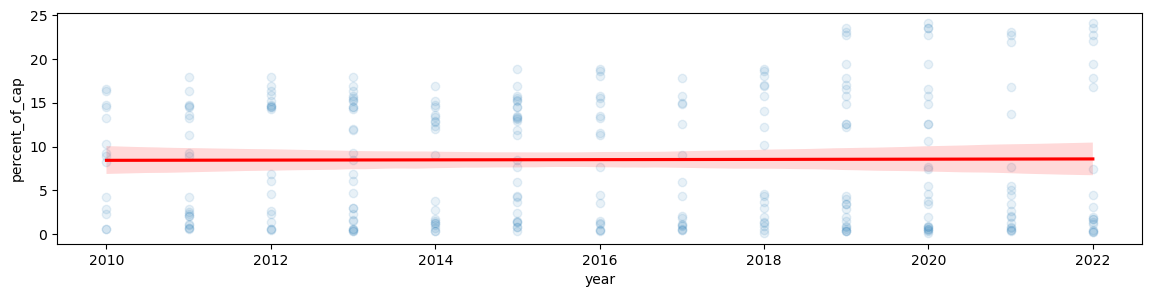

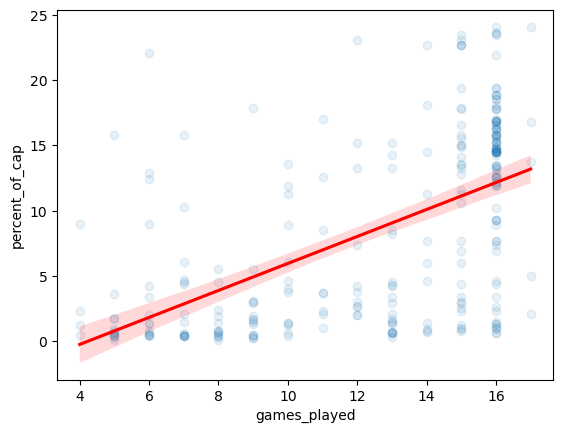

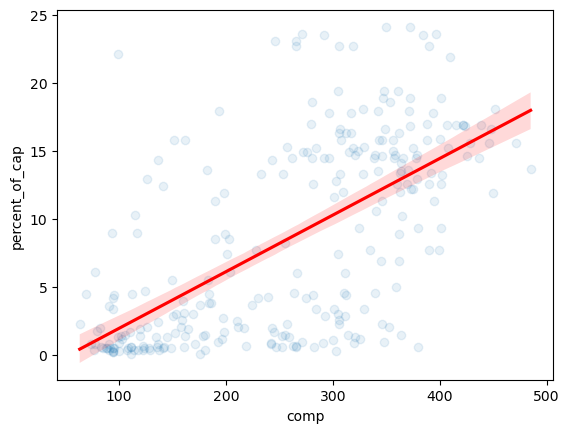

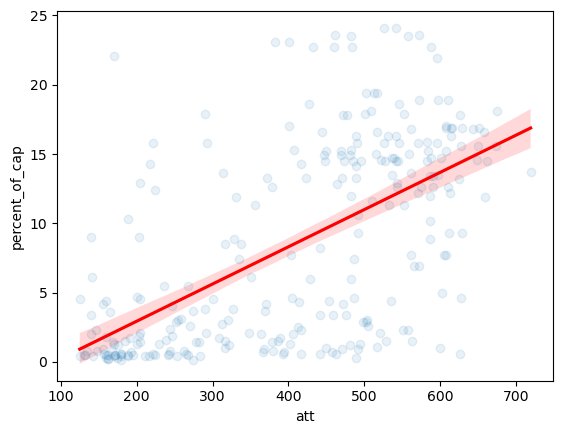

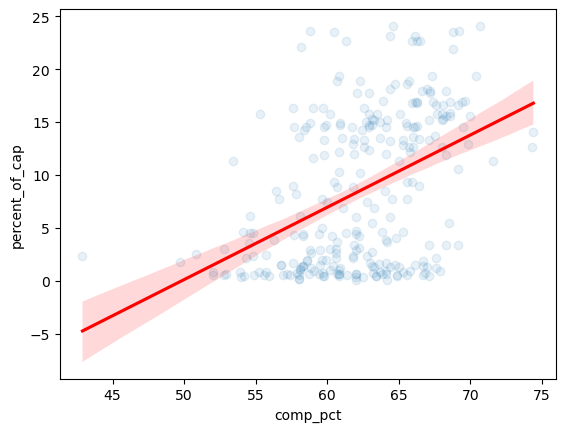

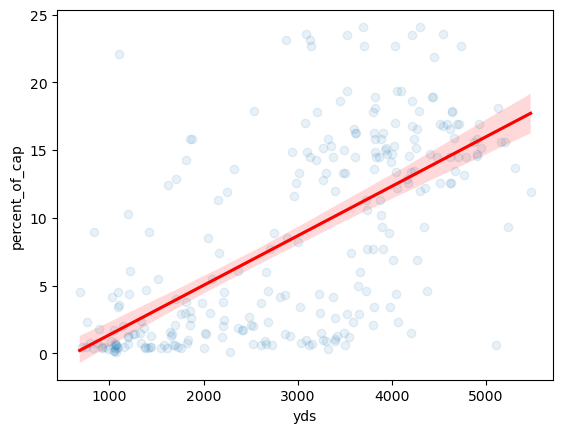

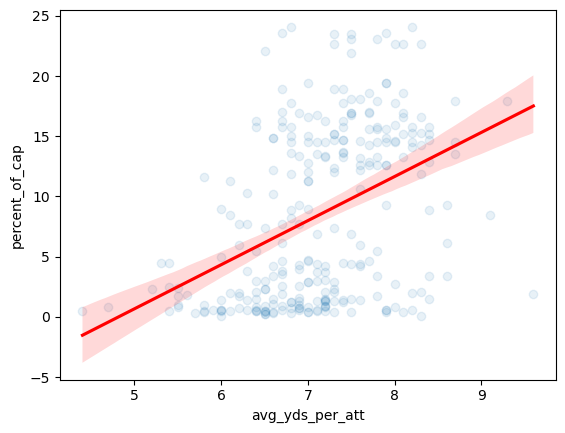

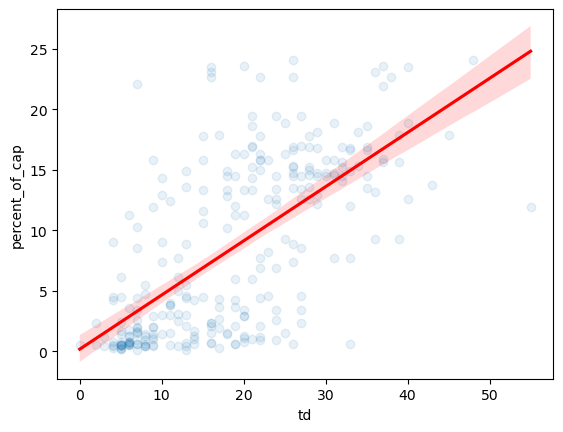

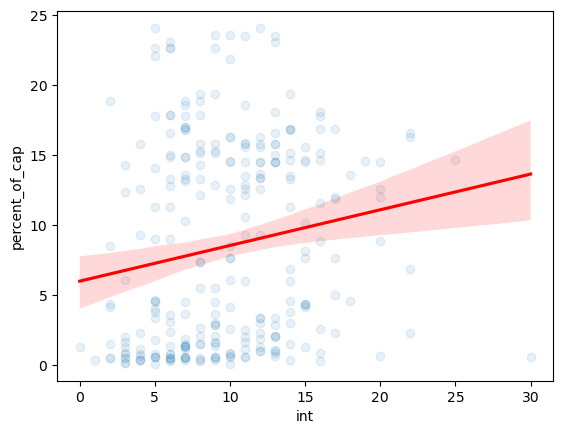

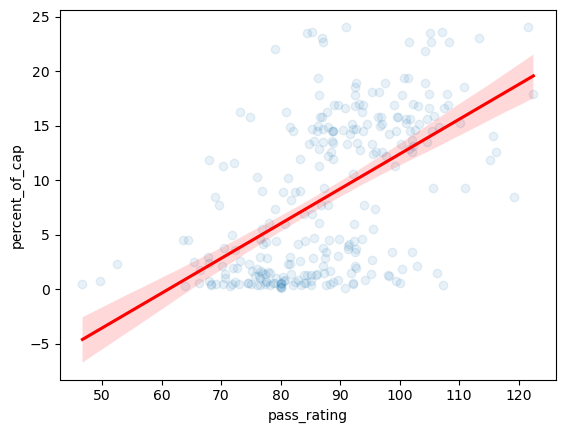

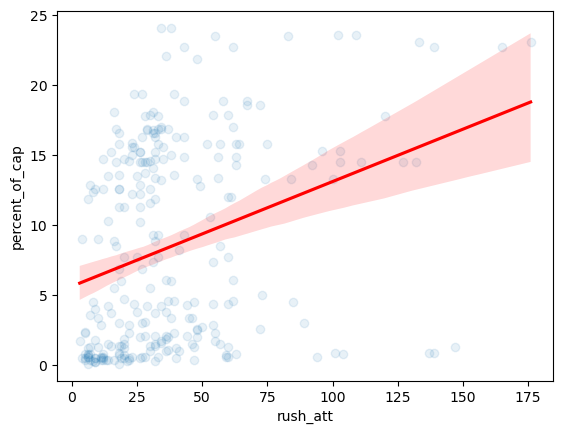

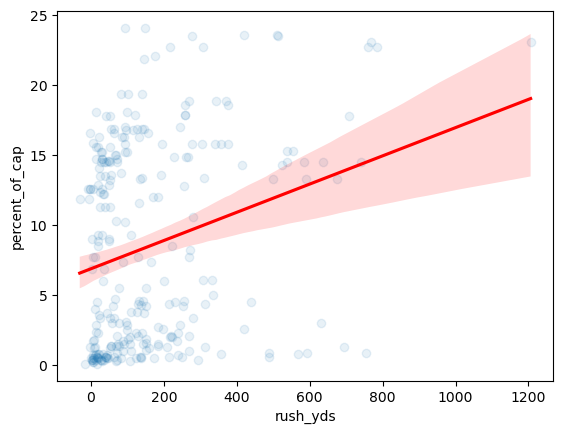

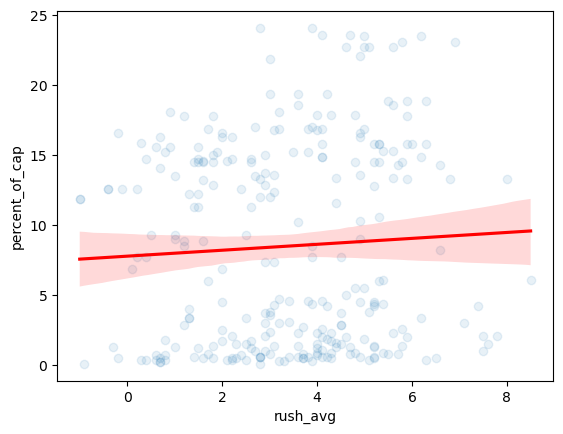

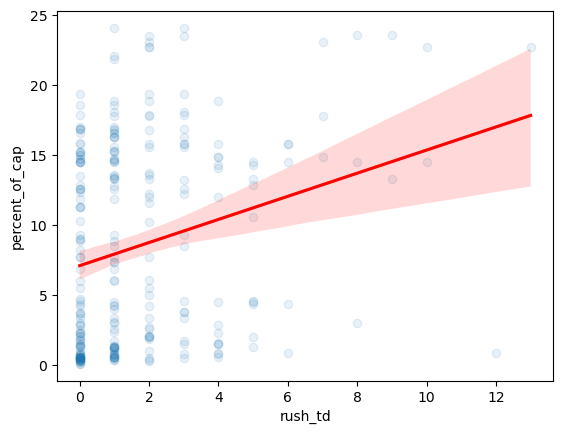

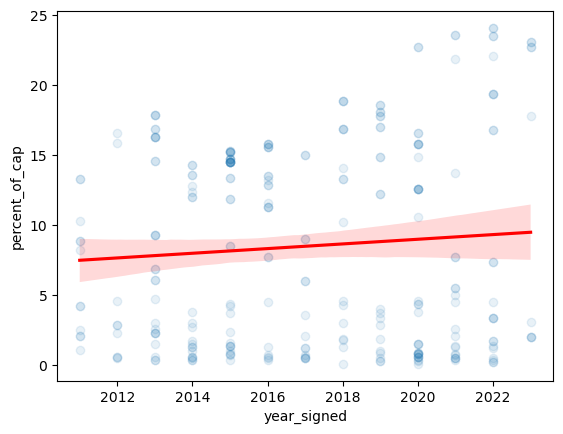

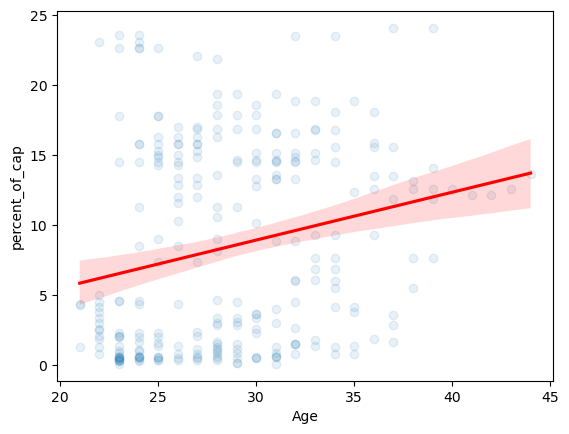

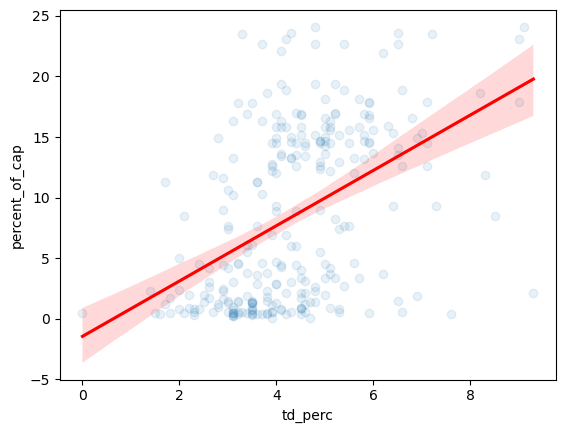

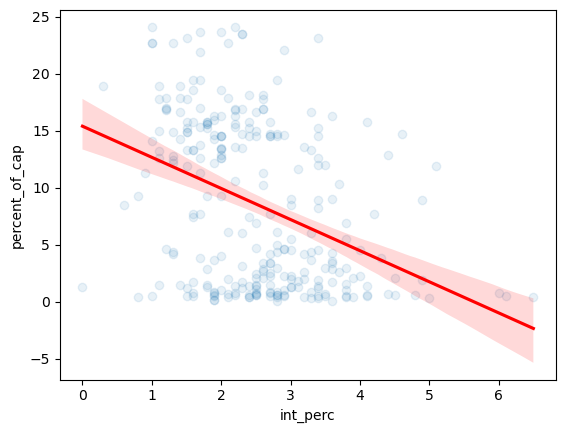

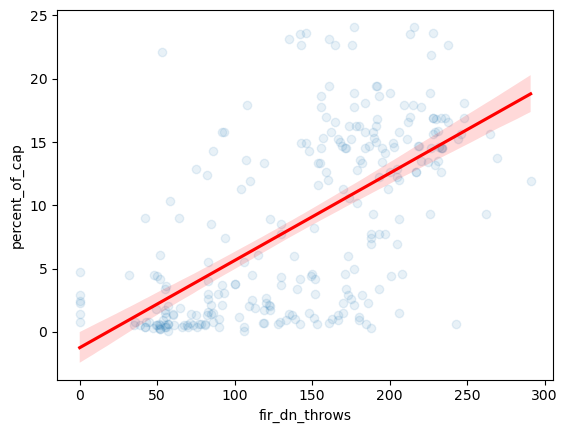

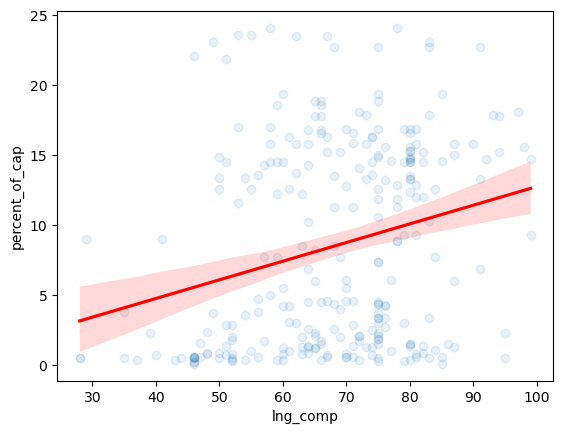

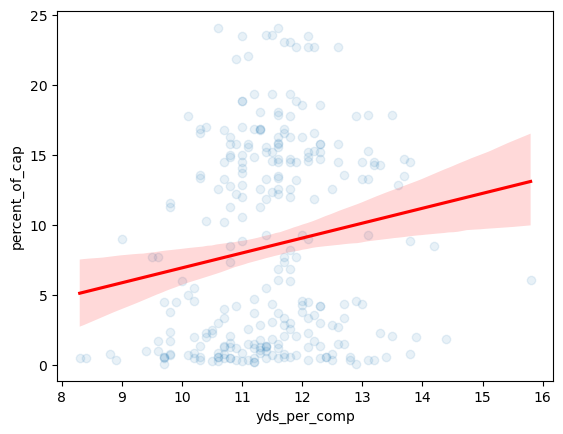

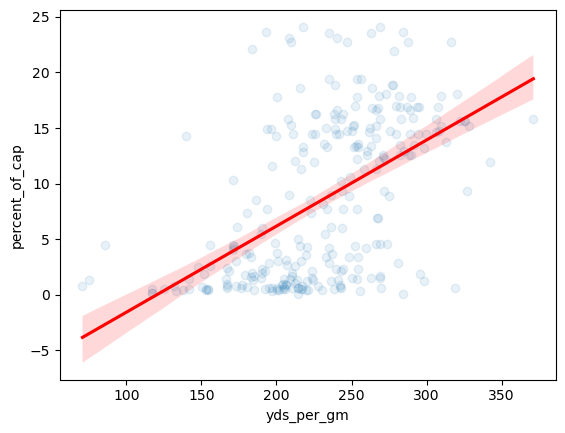

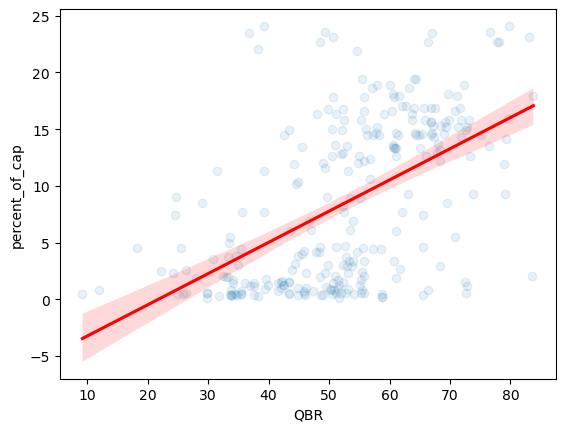

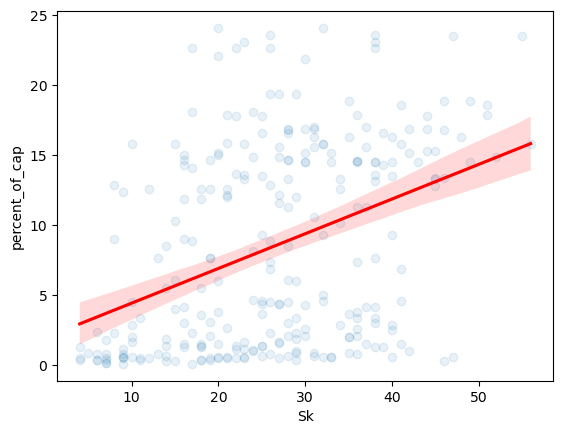

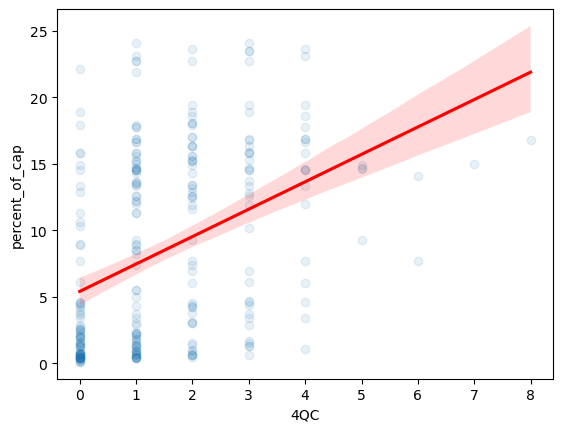

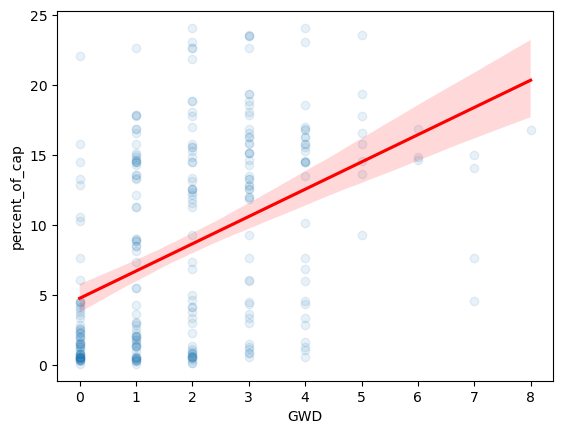

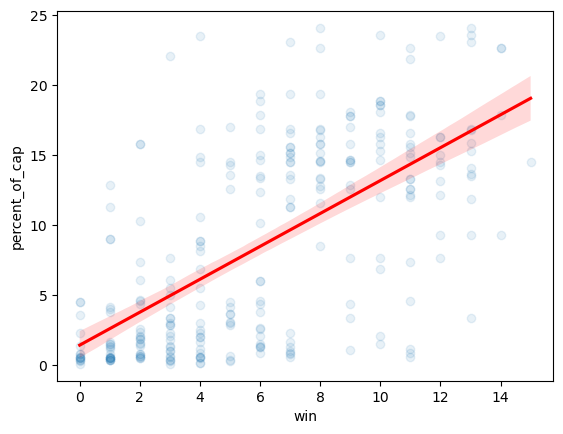

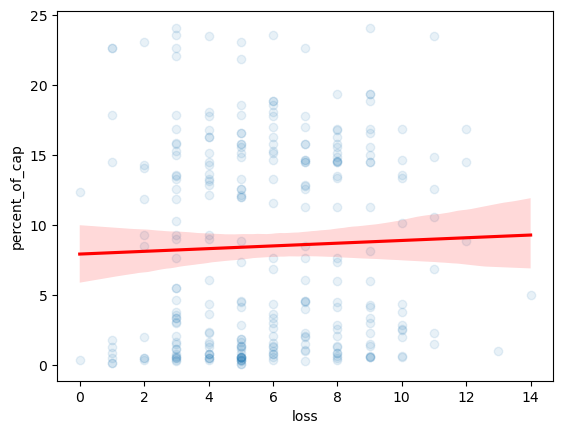

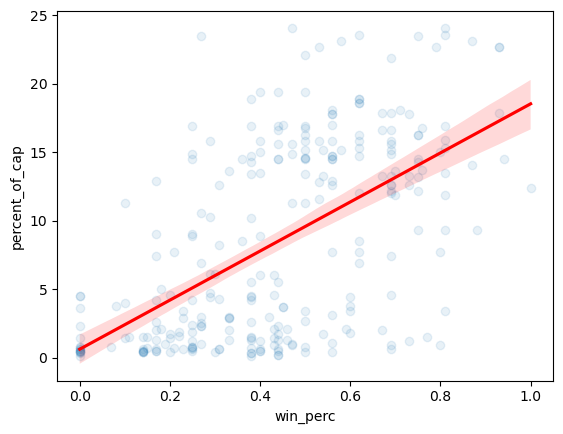

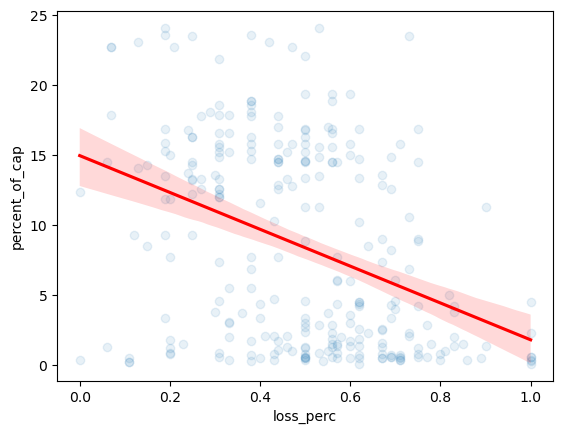

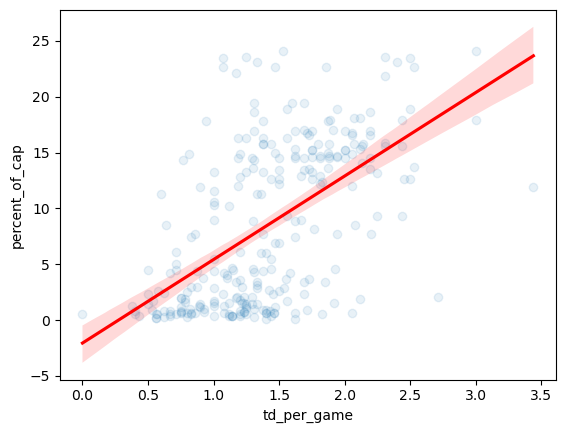

In [196]:
w.correlation_charts(train, columns_list, target)

In [20]:
X_train, X_validate, X_test, y_train, y_validate, y_test = w.get_X_train_val_test(train, validate, test, columns_list, target)                                                                           

In [21]:
X_train

,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,year_signed,Age,td_perc,int_perc,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss,wild_card,div_rnd,conf_rnd,superbowl,superbowl_win,win_perc,loss_perc,td_per_game,sk_per_game
91,2012,16.0,338.0,527.0,64.1,3606.0,6.8,26.0,15.0,88.63,27.0,40.0,1.5,0.0,2015,31,4.9,2.8,184,80,10.7,225.4,42.6,49,0.0,0.0,7,9,0.0,0.0,0.0,0.0,0.0,0.44,0.56,1.62,3.06
180,2019,14.0,319.0,484.0,65.9,4031.0,8.3,26.0,5.0,105.31,43.0,218.0,5.1,2.0,2020,24,5.4,1.0,176,83,12.6,287.9,77.7,17,1.0,1.0,11,3,0.0,1.0,1.0,1.0,1.0,0.79,0.21,1.86,1.21
360,2022,4.0,103.0,175.0,58.9,1192.0,6.8,3.0,4.0,75.70,6.0,9.0,1.5,1.0,2022,27,1.7,2.3,56,60,11.6,298.0,37.0,9,0.0,0.0,1,3,0.0,0.0,0.0,0.0,0.0,0.25,0.75,0.75,2.25
243,2015,7.0,162.0,293.0,55.3,1881.0,6.4,15.0,12.0,74.91,33.0,196.0,5.9,0.0,2016,26,5.1,4.1,92,87,11.6,268.7,52.4,15,1.0,2.0,2,5,0.0,0.0,0.0,0.0,0.0,0.29,0.71,2.14,2.14
76,2014,6.0,126.0,204.0,61.8,1710.0,8.4,10.0,9.0,86.44,7.0,20.0,2.9,0.0,2016,26,4.9,4.4,75,81,13.6,285.0,52.3,8,0.0,0.0,1,4,0.0,0.0,0.0,0.0,0.0,0.17,0.67,1.67,1.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2017,7.0,126.0,204.0,61.8,1699.0,8.3,19.0,8.0,102.96,36.0,269.0,7.5,2.0,2017,22,9.3,3.9,85,72,13.5,242.7,83.5,19,0.0,0.0,3,3,0.0,0.0,0.0,0.0,0.0,0.43,0.43,2.71,2.71
202,2018,16.0,99.0,170.0,58.2,1201.0,7.1,6.0,3.0,84.46,147.0,695.0,4.7,5.0,2018,21,3.5,1.8,60,74,12.1,75.1,42.6,16,0.0,1.0,6,1,1.0,0.0,0.0,0.0,0.0,0.38,0.06,0.38,1.00
141,2011,10.0,199.0,328.0,60.7,2751.0,8.4,13.0,16.0,80.48,16.0,20.0,1.2,1.0,2011,32,4.0,4.9,123,78,13.8,275.3,53.5,17,0.0,1.0,4,5,0.0,0.0,0.0,0.0,0.0,0.40,0.50,1.30,1.70
390,2013,8.0,137.0,253.0,54.2,1760.0,7.0,9.0,6.0,78.17,14.0,72.0,5.1,1.0,2013,25,3.6,2.4,76,66,12.8,220.0,48.6,19,0.0,0.0,0,8,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1.12,2.38


In [22]:
drop_cols = ['Age']

In [23]:
def Xy_train_val_test(train, validate, test, target_variable, drop_cols):
    """
    input train, validate, test, after using split function()
    input target_variable as string
    drop_cols formatted as: ['col1', 'col2', 'etc'] for multiple columns
        This function will drop all 'object' columns. Identify additional 
        columns you want to drop and insert 1 column as a string or multiple
        columns in a list of strings.
    returns:
    X_train, X_validate, X_test, y_train, y_validate, y_test
    """
    
    baseline_accuracy = train[target_variable].mean()
    print(f'Baseline Accuracy: {baseline_accuracy}')
    
    X_train = train.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    X_validate = validate.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    X_test = test.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    
    y_train = train[target_variable]
    y_validate = validate[target_variable]
    y_test = test[target_variable]
    
    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [24]:
X_train, X_validate, X_test, y_train, y_validate, y_test = Xy_train_val_test(train, validate, test, target, drop_cols)

Baseline Accuracy: 8.512087912087916


In [25]:
X_train, X_validate, X_test = w.scale_data(X_train, X_validate, X_test, cols = X_train.columns)

In [26]:
df1, df2, df3 = w.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:294: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

In [233]:
df1

,model_train,rmse,r2
0,baseline,7.175664,0.000000
1,ordinary least squared(OLS),4.600045,0.589040
2,lasso lars(lars),7.175664,0.000000
3,Polynomial Regression(poly2),0.074294,0.999893
4,Generalized Linear Model (GLM),5.309060,0.452592


In [27]:
df1

,model_train,rmse,r2
0,baseline,7.175664,0.000000
1,ordinary least squared(OLS),4.573294,0.593805
2,lasso lars(lars),7.175664,0.000000
3,Polynomial Regression(poly2),0.074289,0.999893
4,Generalized Linear Model (GLM),5.298141,0.454841


In [234]:
df2

,model_validate,rmse,r2
0,baseline,7.175664e+00,0.000000e+00
1,ordinary least squared(OLS),5.416028e+00,3.824427e-01
2,lasso lars(lars),6.896546e+00,-1.333225e-03
3,Polynomial Regression(poly2),2.428278e+08,-1.241401e+15
4,Generalized Linear Model (GLM),5.982963e+00,2.463875e-01


In [204]:
df2

,model_validate,rmse,r2
0,baseline,7.175664e+00,0.000000e+00
1,ordinary least squared(OLS),5.368153e+00,3.933123e-01
2,lasso lars(lars),6.896546e+00,-1.333225e-03
3,Polynomial Regression(poly2),4.819432e+07,-4.889981e+13
4,Generalized Linear Model (GLM),5.907244e+00,2.653419e-01


In [ ]:
# read in information from clipboard to prep for new merge
fake = pd.read_clipboard()

In [ ]:
fake

#### Code to split win and loss column

In [ ]:
# split up record column into a win and a loss column
fake = fake.assign(win=fake['QBrec'].str.split('-').str[0].astype(int),
                   loss=fake['QBrec'].str.split('-').str[1].astype(int))

In [ ]:

fake

#### Columns we want to merge

In [ ]:
# rename columns we want to merge
fake.rename(columns={'TD%': 'td_perc', 'Int%': 'int_perc', '1D':'fir_dn_throws', 'Lng':'lng_comp', 'Y/C':'yds_per_comp', 'Y/G':'yds_per_gm'})

In [ ]:
# isolating columns to merge
['Age', 'td_perc', 'int_perc', 'fir_dn_throws', 'lng_comp', 'yds_per_comp', 'yds_per_gm', 'QBR', 'Sk', '4QC', 'GWD', 'win', 'loss']

In [ ]:
# making sure we don't pull over duplicate columns by checking column names
train.head()

#### Cleaning the player name to merge df's

In [ ]:
# Function to clean the names
def clean_name(name):
    cleaned_name = re.sub(r'[^\w\s]+$', '', name)
    return cleaned_name

In [ ]:
# Applying the cleaning function to the 'Name' column
fake['Player'] = fake['Player'].apply(clean_name)

In [332]:
from sklearn.cluster import KMeans

In [348]:
def clusters(train, var1, var2, clusters=5):
    '''
    
    '''
    train_X=train[[var1, var2]]
    #Initialize the KMeans model and fit it to my features
    # MAKE the thing
    train_kmeans=KMeans(clusters)
    # FIT the thing
    train_kmeans.fit(train_X)
    #USE the thing
    train_kmeans.predict(train_X)
    train['cluster'] = train_kmeans.predict(train_X)
    # scatter plot of data with hue for cluster
    sns.scatterplot(x = var1, y = var2, data = train, hue = 'cluster')
    # plot cluster centers (centroids)
    # centroids.plot.scatter(x = var1, y = var2, ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')
    # plt.title('Visualizing Cluster Centers')
    # Get unique cluster labels
    unique_clusters = train['cluster'].unique()
    # Create legend labels for clusters
    cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left');
    plt.show()

In [354]:
train.columns

Index(['name', 'team', 'year', 'games_played', 'comp', 'att', 'comp_pct',
       'yds', 'avg_yds_per_att', 'td', 'int', 'pass_rating', 'rush_att',
       'rush_yds', 'rush_avg', 'rush_td', 'full_name', 'year_signed',
       'percent_of_cap', 'Player', 'Age', 'td_perc', 'int_perc',
       'fir_dn_throws', 'lng_comp', 'yds_per_comp', 'yds_per_gm', 'QBR', 'Sk',
       '4QC', 'GWD', 'win', 'loss', 'win_perc', 'loss_perc', 'td_per_game',
       'sk_per_game', 'cluster'],
      dtype='object')

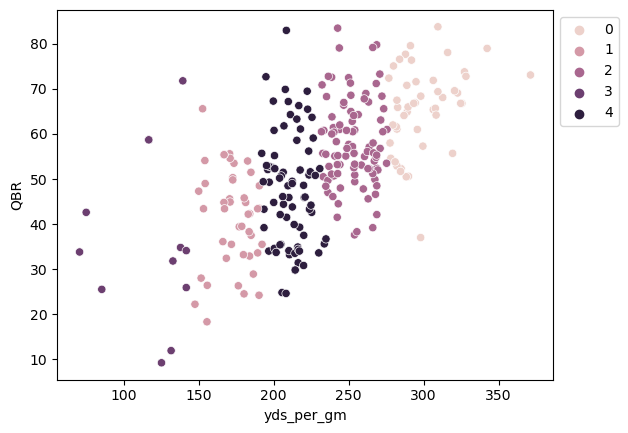

In [361]:
clusters(train, 'yds_per_gm', 'QBR', 5)

In [95]:
import requests
from requests import get
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from webdriver_manager.chrome import ChromeDriverManager

import time as t

In [381]:
df[df.name=='Brock Purdy']

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,full_name,year_signed,percent_of_cap,Player,Age,td_perc,int_perc,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss,win_perc,loss_perc,td_per_game,sk_per_game
327,Brock Purdy,SF,2022,9.0,114.0,170.0,67.1,1374.0,8.1,13.0,4.0,107.33,22.0,13.0,0.6,1.0,Brock Purdy,2022,0.4,Brock Purdy,23,7.6,2.4,66,54,12.1,152.7,65.6,11,1.0,1.0,5,0,0.56,0.0,1.44,1.22


In [ ]:
def get_playoff_teams(url):
    response = get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    playoffs_list = []
    for name in soup.find_all('div', style='font-weight: bold;'):
        playoffs_list.append(name.text)
    cleaned_list = [item for item in playoffs_list if item not in ('@', 'FINAL', 'FINAL OT')]
    df = pd.DataFrame(cleaned_list)
    return df

In [144]:
url = 'https://www.nfl.com/schedules/2022/POST1/'

In [66]:
years = ['2022', '2021', '2020', '2019', '2018','2017','2016','2015','2014','2013','2012','2011','2010',]

In [73]:
rounds = ['1', '2', '3', '4']

In [77]:
links = []

for year in years:
    for rnd in rounds:
        page = f'https://www.nfl.com/schedules/{year}/POST{rnd}/'
        links.append(page)

In [79]:
# wildcard = {"year": [],
#            "team": []}
# div_rnd = []
# conf_champ = []
# superbowl



In [90]:
playoff_data = {
                'team': [],
                'year': [],
                'round': [],
                
}

for link in links:
    string = link
    print(link)
    year = re.findall(r'\d{4}', string)[0]
    print(year)
    rounds = string.split('/')[-2]
    print(rounds)

https://www.nfl.com/schedules/2022/POST1/
2022
POST1
https://www.nfl.com/schedules/2022/POST2/
2022
POST2
https://www.nfl.com/schedules/2022/POST3/
2022
POST3
https://www.nfl.com/schedules/2022/POST4/
2022
POST4
https://www.nfl.com/schedules/2021/POST1/
2021
POST1
https://www.nfl.com/schedules/2021/POST2/
2021
POST2
https://www.nfl.com/schedules/2021/POST3/
2021
POST3
https://www.nfl.com/schedules/2021/POST4/
2021
POST4
https://www.nfl.com/schedules/2020/POST1/
2020
POST1
https://www.nfl.com/schedules/2020/POST2/
2020
POST2
https://www.nfl.com/schedules/2020/POST3/
2020
POST3
https://www.nfl.com/schedules/2020/POST4/
2020
POST4
https://www.nfl.com/schedules/2019/POST1/
2019
POST1
https://www.nfl.com/schedules/2019/POST2/
2019
POST2
https://www.nfl.com/schedules/2019/POST3/
2019
POST3
https://www.nfl.com/schedules/2019/POST4/
2019
POST4
https://www.nfl.com/schedules/2018/POST1/
2018
POST1
https://www.nfl.com/schedules/2018/POST2/
2018
POST2
https://www.nfl.com/schedules/2018/POST3/
2018

In [145]:
url

'https://www.nfl.com/schedules/2022/POST1/'

In [149]:
response = get(url)
soup = BeautifulSoup(response.content, 'html.parser')
response

<Response [200]>

In [150]:
soup.find_all('div', class_="nfl-c-matchup-strip__game")

[]

In [170]:
# soup

In [153]:
df = pd.read_clipboard()

In [155]:
df = df.fillna(0)

In [156]:
df

,team,year,wild_card,div_rnd,conf_rnd,superbowl,superbowl_win
0,SEA,2022,1.0,0.0,0.0,0.0,0.0
1,SF,2022,1.0,1.0,1.0,0.0,0.0
2,LAC,2022,1.0,0.0,0.0,0.0,0.0
3,JAX,2022,1.0,1.0,0.0,0.0,0.0
4,MIA,2022,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
157,PHI,2010,1.0,0.0,0.0,0.0,0.0
158,PIT,2010,0.0,1.0,1.0,1.0,0.0
159,ATL,2010,0.0,1.0,0.0,0.0,0.0
160,NE,2010,0.0,1.0,0.0,0.0,0.0


In [158]:
df2 = pd.read_csv('pivot_final_2.csv')

In [159]:
df2

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,...,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss
0,Rex Grossman,WAS,2010,4.0,74.0,133.0,55.6,884.0,6.6,7.0,...,42,64,11.9,221.0,33.000000,9,0.0,1.0,1,2
1,Rex Grossman,WAS,2011,13.0,265.0,458.0,57.9,3148.0,6.9,16.0,...,161,51,11.9,242.4,41.500000,25,2.0,2.0,5,8
2,Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,...,0,56,11.2,198.9,52.597577,24,3.0,2.0,2,3
3,Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,...,0,56,11.2,198.9,52.597577,24,3.0,2.0,2,3
4,Jameis Winston,TB,2015,16.0,312.0,535.0,58.3,4042.0,7.6,22.0,...,201,68,13.0,252.6,57.200000,27,2.0,3.0,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,Ben Roethlisberger,PIT,2016,14.0,328.0,509.0,64.4,3819.0,7.5,29.0,...,184,72,11.6,272.8,60.500000,17,2.0,2.0,10,4
452,Ben Roethlisberger,PIT,2017,15.0,360.0,561.0,64.2,4251.0,7.6,28.0,...,204,97,11.8,283.4,66.600000,21,3.0,4.0,12,3
453,Ben Roethlisberger,PIT,2018,16.0,452.0,675.0,67.0,5129.0,7.6,34.0,...,248,97,11.3,320.6,69.600000,24,2.0,3.0,9,6
454,Ben Roethlisberger,PIT,2020,15.0,399.0,608.0,65.6,3803.0,6.3,33.0,...,193,84,9.5,253.5,52.500000,13,4.0,4.0,12,3


In [ ]:
pd.merge(df, )

In [164]:
df = df2.merge(df[['team','year','wild_card', 'div_rnd', 'conf_rnd', 'superbowl', 'superbowl_win']],
                   left_on =['team', 'year'],
                   right_on = ['team', 'year'], how = 'left')

In [167]:
df = df.fillna(0)

In [169]:
# df.to_csv('pivot_final_3.csv', index=False)

In [209]:
y_train.mean()

8.512087912087916